# Transfer clusters to query dataset

In [ ]:
! pip install sklearn-ann[annoy]

In [1]:
import numpy as np
import pandas as pd

import scanpy as sc
from sklearn_ann.kneighbors.annoy import AnnoyTransformer  # noqa: F401

In [2]:
condition_key = 'dataset'
cell_type_key = 'cell_type_tumor'

backup_path = '/root/datos/maestria/netopaas/luca_explore/surgeries/'
surgery_path = f'{backup_path}/Zuani_99acc'
ref_path = '/root/datos/maestria/netopaas/luca_explore/surgeries/Subcluster'

### Import

In [6]:
ref_latent = sc.read_h5ad(f'{ref_path}/query_latent.h5ad')
ref_latent

AnnData object with n_obs × n_vars = 1149161 × 10
    obs: 'cell_type', 'batch', 'dataset'

### Separate

In [7]:
query_latent = ref_latent[ref_latent.obs['dataset']=='Zuani']
ref_latent = ref_latent[ref_latent.obs['dataset']!='Zuani']

### Leiden Clusters

In [72]:
ref_latent.obs['cell_type_adjusted'] = None

In [74]:
ds = 'Atlas'
csv_path = f"{backup_path}/{ds}_predicted_leiden.csv"
leiden_csv = pd.read_csv(csv_path, index_col=0)
leiden_csv.index += '-0'
ref_latent.obs.loc[leiden_csv.index,'cell_type_adjusted'] = leiden_csv.cell_type_adjusted
ref_latent.obs

,cell_type,batch,dataset,cell_type_adjusted
0-0-0-0-0,T cell CD8 effector memory,Chen_Zhang_2020,Chen_Zhang_2020,T cell CD8 effector memory
1-0-0-0-0,Tumor cells LUAD,Chen_Zhang_2020,Chen_Zhang_2020,Tumor LUAD_Club
2-0-0-0-0,B cell,Chen_Zhang_2020,Chen_Zhang_2020,B cell
3-0-0-0-0,B cell,Chen_Zhang_2020,Chen_Zhang_2020,B cell
4-0-0-0-0,Plasma cell,Chen_Zhang_2020,Chen_Zhang_2020,Plasma cell
...,...,...,...,...
BD_immune13_111313_Hu-1,Tumor cells LUSC mitotic,BD_immune13_Hu,Hu,None
BD_immune13_791956_Hu-1,Macrophage,BD_immune13_Hu,Hu,None
BD_immune14_462072_Hu-1,B cell dividing,BD_immune14_Hu,Hu,None
BD_immune14_124095_Hu-1,B cell dividing,BD_immune14_Hu,Hu,None


In [27]:
ds = 'Deng'
csv_path = f"{backup_path}/{ds}_predicted_leiden.csv"
leiden_csv = pd.read_csv(csv_path)
leiden_csv.index = leiden_csv.index.astype(str) + '_Deng-1-0'
ref_latent.obs.loc[leiden_csv.index,'cell_type_adjusted'] = leiden_csv.cell_type_adjusted
ref_latent.obs[ref_latent.obs.dataset == ds]

,cell_type,batch,dataset,cell_type_adjusted
0_Deng-1-0,Mast cell,P001_Deng,Deng,Mast cell
1_Deng-1-0,T cell CD8 effector memory,P001_Deng,Deng,T cell CD8 effector memory
2_Deng-1-0,T cell CD4,P001_Deng,Deng,T cell CD4
3_Deng-1-0,T cell CD8 activated,P001_Deng,Deng,T cell CD8 activated
4_Deng-1-0,Mast cell,P001_Deng,Deng,Mast cell
...,...,...,...,...
421706_Deng-1-0,Macrophage,P049_Deng,Deng,Macrophage
421707_Deng-1-0,Plasma cell,P049_Deng,Deng,Plasma cell
421708_Deng-1-0,B cell,P049_Deng,Deng,B cell
421709_Deng-1-0,T cell CD8 effector memory,P049_Deng,Deng,T cell CD8 effector memory


In [77]:
ds = 'Bishoff'
csv_path = f"{backup_path}/{ds}_predicted_leiden.csv"
leiden_csv = pd.read_csv(csv_path)
leiden_csv.index = leiden_csv.index.astype(str) + '_Bishoff-1-0-0'
ref_latent.obs.loc[leiden_csv.index,'cell_type_adjusted'] = leiden_csv.cell_type_adjusted
ref_latent.obs[ref_latent.obs.dataset == ds]

,cell_type,batch,dataset,cell_type_adjusted
0_Bishoff-1-0-0,T cell CD4,p033t_Bishoff,Bishoff,T cell CD4
1_Bishoff-1-0-0,T cell CD8 effector memory,p033t_Bishoff,Bishoff,T cell CD8 effector memory
2_Bishoff-1-0-0,Tumor cells NSCLC mixed,p033t_Bishoff,Bishoff,Tumor LUAD_mixed
3_Bishoff-1-0-0,T cell CD8 effector memory,p033t_Bishoff,Bishoff,T cell CD8 effector memory
4_Bishoff-1-0-0,Plasma cell,p033t_Bishoff,Bishoff,Plasma cell
...,...,...,...,...
11615_Bishoff-1-0-0,Tumor cells LUAD,p019t_Bishoff,Bishoff,Tumor LUAD_mixed
11616_Bishoff-1-0-0,Tumor cells LUAD,p019t_Bishoff,Bishoff,Tumor LUAD_mixed
11617_Bishoff-1-0-0,T cell regulatory,p019t_Bishoff,Bishoff,T cell regulatory
11618_Bishoff-1-0-0,T cell CD8 effector memory,p019t_Bishoff,Bishoff,T cell CD8 effector memory


In [78]:
ds = 'Hu'
csv_path = f"{backup_path}/{ds}_predicted_leiden.csv"
leiden_csv = pd.read_csv(csv_path)
leiden_csv.index = leiden_csv['index'].apply(lambda x: '_'.join(eval(x))+ '_Hu-1')
ref_latent.obs.loc[leiden_csv.index,'cell_type_adjusted'] = leiden_csv.cell_type_adjusted
ref_latent.obs[ref_latent.obs.dataset == ds]

,cell_type,batch,dataset,cell_type_adjusted
BD_immune01_612637_Hu-1,Tumor cells LUSC mitotic,BD_immune01_Hu,Hu,Tumor LUAD_LUSC_mitotic
BD_immune01_698718_Hu-1,Tumor cells LUSC mitotic,BD_immune01_Hu,Hu,Tumor LUAD_LUSC_mitotic
BD_immune01_509246_Hu-1,Tumor cells LUSC mitotic,BD_immune01_Hu,Hu,Tumor LUAD_LUSC_mitotic
BD_immune01_101435_Hu-1,Tumor cells LUSC mitotic,BD_immune01_Hu,Hu,Tumor LUAD_LUSC_mitotic
BD_immune01_400370_Hu-1,T cell CD8 dividing,BD_immune01_Hu,Hu,T cell CD8 dividing
...,...,...,...,...
BD_immune13_111313_Hu-1,Tumor cells LUSC mitotic,BD_immune13_Hu,Hu,Tumor LUAD_LUSC_mitotic
BD_immune13_791956_Hu-1,Macrophage,BD_immune13_Hu,Hu,Macrophage
BD_immune14_462072_Hu-1,B cell dividing,BD_immune14_Hu,Hu,B cell dividing
BD_immune14_124095_Hu-1,B cell dividing,BD_immune14_Hu,Hu,B cell dividing


### Get neighbours

In [6]:
m = 15
transformer = AnnoyTransformer(m)
%timeit sc.pp.neighbors(ref_latent, transformer=transformer, key_added='annnoy')

58.7 s ± 523 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
ref_neighbors, ref_distances = [], []
for obs_ix in range(0, query_latent.shape[0]):
    neigh_l, dist_l = transformer.annoy_.get_nns_by_vector(query_latent.X.T[:,obs_ix], m, search_k=-1, include_distances=True)
    ref_neighbors.append(neigh_l)
    ref_distances.append(dist_l)


We want to check if the assignment had good consensus, like with the uncertainties of the variatonal autoencoder.

For that we need a weight based on the distance distribution of the `m` neighbours to be comparable. We assign the weights based on a poisson distribution $e^\lambda$.

In [8]:
# convert distances to affinities
stds = np.std(ref_distances, axis=1)
stds = (2.0 / stds) ** 2
stds = stds.reshape(-1, 1)
# We assume poisson distribution
ref_distances_tilda = np.exp(-np.true_divide(ref_distances, stds))
weights = ref_distances_tilda / np.sum(ref_distances_tilda, axis=1, keepdims=True)

In [10]:
query_latent.uns['weights'] = weights
query_latent.uns['neighbours'] = ref_neighbours

NameError: name 'ref_neighbours' is not defined

In [ ]:
! mkdir {surgery_path}/Extend_Zuani

In [11]:
ref_latent.write_h5ad(f'{surgery_path}/Extend_Zuani/ref_latent.h5ad')
query_latent.write_h5ad(f'{surgery_path}/Extend_Zuani/query_latent.h5ad')

# ref_latent = sc.read(f'{surgery_path}/Extend_Zuani/ref_latent.h5ad')
# query_latent = sc.read(f'{surgery_path}/Extend_Zuani/query_latent.h5ad')

# weights = query_latent.uns['weights']
# ref_neighbours = query_latent.uns['neighbours']

To see if the prediction had good consensus we need to get the three best candidates to compare if
the first one is indeed much better that the others.

In [12]:
import jax
import jax.numpy as jnp
from jax import jit, vmap
import numpy as np

def weighted_k_prediction(weights, ref_cats, num_categories, k):
    """
    Get the k-highest weight categories and uncertainties for each observation using JAX.

    Args:
        weights (jax.numpy.ndarray): Array of shape (N, M) where N is the number of observations
                                     and M is the number of neighbors.
        ref_cats (jax.numpy.ndarray): Array of shape (N, M) containing category codes.
        num_categories (int): Total number of unique categories.
        k (int): Number of top predictions to retrieve.

    Returns:
        Tuple[jax.numpy.ndarray, jax.numpy.ndarray, jax.numpy.ndarray]:
            - topk_preds: Array of shape (N, k) with the predicted category codes.
            - topk_probs: Array of shape (N, k) with probability scores for each prediction.
    """
    one_hot = jax.nn.one_hot(ref_cats, num_categories)  # Shape: (N, M, C)    
    # Multiply weights with one-hot encodings and sum over neighbors
    weighted_sums = jnp.einsum('nmc,nm->nc', one_hot, weights)  # Shape: (N, C)

    # Use argpartition to get indices of top-k categories for each observation
    # jnp.argpartition partially sorts the array so that the top-k elements are in the last k positions
    topk_indices_unsorted = jnp.argpartition(weighted_sums, -k, axis=1)[:, -k:]  # Shape: (N, k)
    # Gather the top-k probabilities using advanced indexing
    batch_indices = jnp.arange(weighted_sums.shape[0])[:, None]  # Shape: (N, 1)
    topk_probs_unsorted = weighted_sums[batch_indices, topk_indices_unsorted]  # Shape: (N, k)

    # Now, sort the top-k probs and uncerts in descending order
    sorted_order = jnp.argsort(topk_probs_unsorted, axis=1)[:, ::-1]  # Shape: (N, k)
    topk_indices_sorted = topk_indices_unsorted[batch_indices, sorted_order]  # Shape: (N, k)
    topk_probs_sorted = topk_probs_unsorted[batch_indices, sorted_order]  # Shape: (N, k)

    return topk_indices_sorted, topk_probs_sorted
# Apply JIT with static arguments using the functional API
weighted_prediction_jit = jit(weighted_k_prediction, static_argnums=(2,3))

l = 'cell_type_adjusted'
# Extract category codes and ensure they are JAX arrays
ref_latent.obs[l] = ref_latent.obs[l].astype('category')
ref_cats_np = ref_latent.obs[l].cat.codes.to_numpy()[ref_neighbors]  # Shape: (N, M)
ref_cats = jnp.array(ref_cats_np)
weights = jnp.array(weights)
num_categories = len(ref_latent.obs[l].cat.categories)

k=3
# Get predictions and uncertainty
topk_preds, topk_probs_sorted = weighted_prediction_jit(weights, ref_cats, num_categories, k)

# Convert predictions to actual category names
categories = np.asarray(ref_latent.obs[l].cat.categories)
topk_preds_names = categories[topk_preds]
topk_probs_sorted = np.asarray(topk_probs_sorted)

topk_preds_names = list(zip(*topk_preds_names))
topk_probs_sorted = list(zip(*topk_probs_sorted))
for i in range(0,k):
    query_latent.obs[f"{l}_pred_{i}"] = topk_preds_names[i]
    query_latent.obs[f"{l}_uncertainty_{i}"] = topk_probs_sorted[i]

2024-11-20 17:52:14.190301: W external/xla/xla/service/gpu/nvptx_compiler.cc:836] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version (12.6.77). Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [13]:
query_latent

AnnData object with n_obs × n_vars = 220866 × 10
    obs: 'cell_type', 'batch', 'dataset', 'cell_type_adjusted_pred_0', 'cell_type_adjusted_uncertainty_0', 'cell_type_adjusted_pred_1', 'cell_type_adjusted_uncertainty_1', 'cell_type_adjusted_pred_2', 'cell_type_adjusted_uncertainty_2'
    uns: 'weights'

We create a matrix were we assign the weight of the category for each cell, and for every cell type that is not in the k highest we just impute 0.

### Uncertainty of predictions

In [14]:
uncerts = sum(
    query_latent.obs
    .pivot(columns=f"{l}_pred_{i}", values=f"{l}_uncertainty_{i}")
    .fillna(0)
    .reindex(columns=categories, fill_value=0)
    for i in range(k)
)
uncerts.columns.name = 'cell_type_weight'
uncerts


cell_type_weight,Alveolar cell type 1,Alveolar cell type 2,B cell,B cell dividing,Ciliated,Club,DC mature,Endothelial cell arterial,Endothelial cell capillary,Endothelial cell lymphatic,...,Tumor cells NSCLC mixed,Tumor mitotic_LUSC,Tumor mitotic_mixed,Tumor mixed_LUAD,cDC1,cDC2,myeloid dividing,pDC,stromal dividing,transitional club/AT2
Zuani_AAACCCAAGAACAGGA-1-1-0-0-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Zuani_AAACCCAAGAAGGGAT-1-1-0-0-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Zuani_AAACCCAAGAAGTATC-1-1-0-0-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Zuani_AAACCCAAGAAGTCTA-1-1-0-0-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Zuani_AAACCCAAGAAGTGTT-1-1-0-0-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zuani_TTTGTTGTCTGCTCTG-1-1-0-0-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Zuani_TTTGTTGTCTGTGCTC-1-1-0-0-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.934179,0.0,0.0,0.0
Zuani_TTTGTTGTCTTAGCTT-1-1-0-0-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Zuani_TTTGTTGTCTTCCCAG-1-1-0-0-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


With this we can do a grouping of cell types where we get the average normalized weight aggregating every cell that has its best predictor as a certain cell type.
So if the wieight for the second best predictor is high we will be able to see that the consensus isn't as good.

In [15]:
uncerts_types = uncerts
uncerts_types['cell_type'] = query_latent.obs[f"{l}_pred_0"]

The rows are predicted cell type, and the colls are the mean weight for every category under the group of cells predicted as that row.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='cell_type_weight', ylabel='cell_type'>

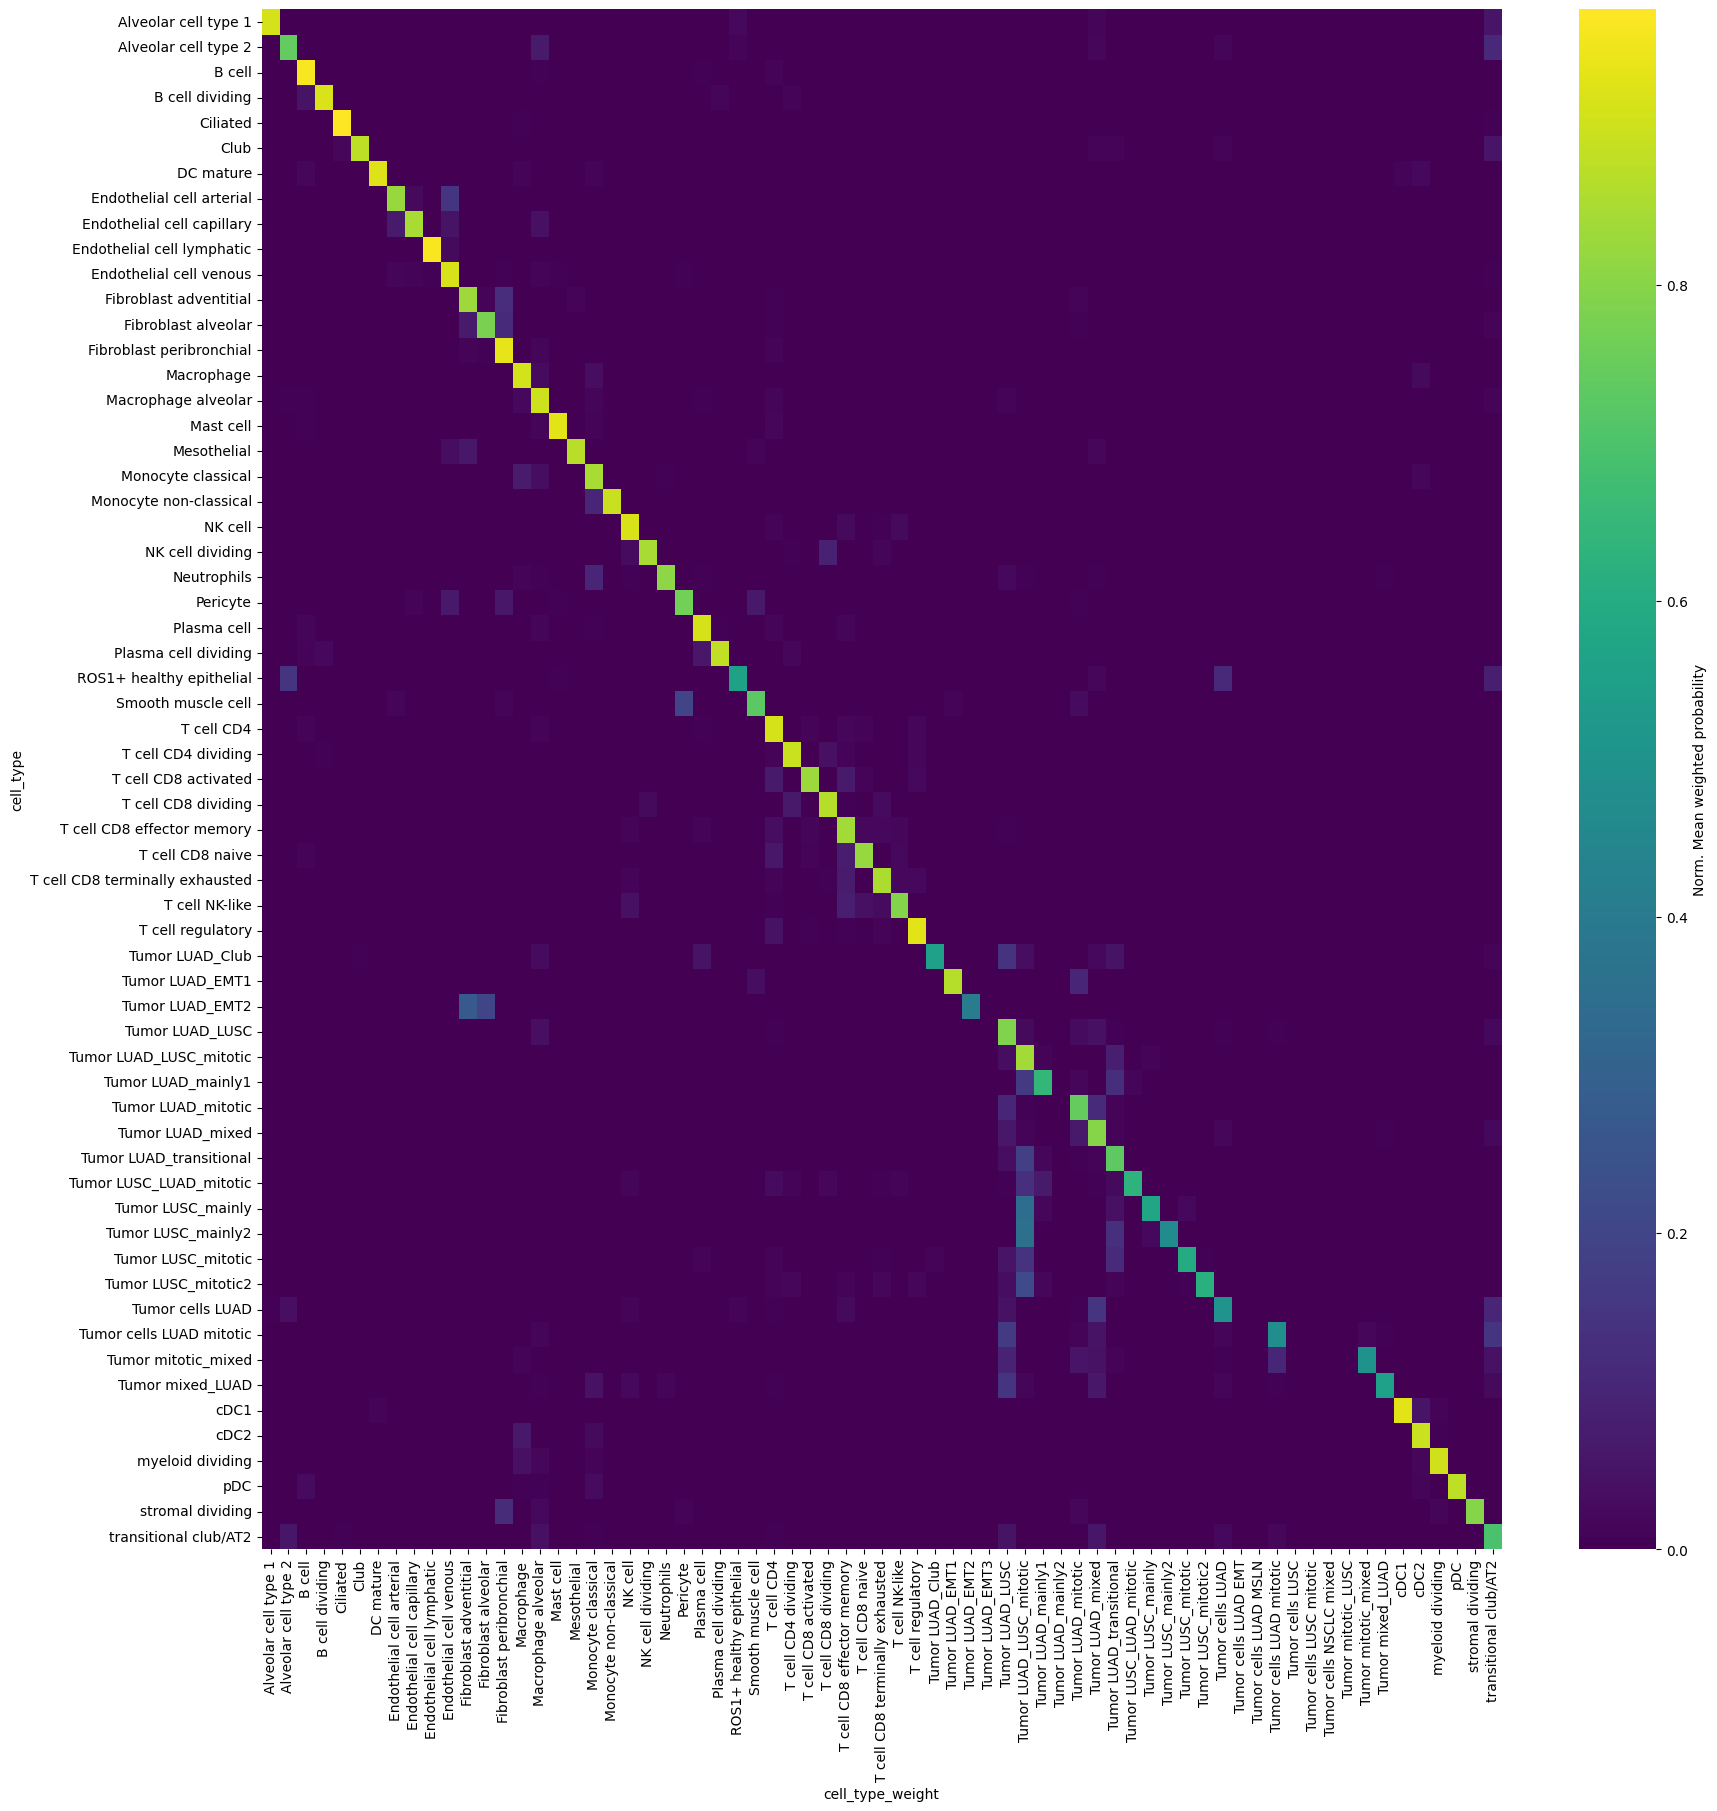

In [25]:
uncerts_group = uncerts_types.groupby(['cell_type']).mean()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(uncerts_group, cmap="viridis", cbar_kws={'label': 'Norm. Mean weighted probability'})

The prediction have reasonable uncertainty

## Export to Leiden CSV

In [36]:
zuani_leiden_csv = query_latent.obs.iloc[:,0:4].rename(columns={"cell_type_adjusted_pred_0":"cell_type_adjusted"})
zuani_leiden_csv.to_csv(f'{surgery_path}/Zuani_predicted_leiden.csv')